In [1]:
import pandas as pd
import league_data_fetcher
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import pickle
import json
import requests as rq

In [2]:
fpl = league_data_fetcher.Fetcher(0.01, 62649, 3)
#with open(r"fpl_obj_league_62649_gw_2.pickle", "rb") as input_file:
    #fpl = pickle.load(input_file)

Status code: 200
Page #1 saved, sleeping for 0.01 s
Status code: 200
Page #2 saved, sleeping for 0.01 s
Status code: 200
Page #3 saved, sleeping for 0.01 s
Status code: 200
Page #4 saved, sleeping for 0.01 s
Status code: 200
Page #5 saved, sleeping for 0.01 s
Status code: 200
Page #6 saved, sleeping for 0.01 s
Status code: 200
Page #7 saved, sleeping for 0.01 s
Status code: 200
Page #8 saved, sleeping for 0.01 s
Status code: 200
Page #9 saved, sleeping for 0.01 s
Status code: 200
Page #10 saved, sleeping for 0.01 s
Status code: 200
Page #11 saved, sleeping for 0.01 s
Status code: 200
Page #12 saved, sleeping for 0.01 s
Status code: 200
Page #13 saved, sleeping for 0.01 s
Status code: 200
Page #14 saved, sleeping for 0.01 s
Status code: 200
Page #15 saved, sleeping for 0.01 s
Status code: 200
Page #16 saved, sleeping for 0.01 s
Status code: 200
Page #17 saved, sleeping for 0.01 s
Status code: 200
Page #18 saved, sleeping for 0.01 s
Status code: 200
Page #19 saved, sleeping for 0.01 s
St

In [3]:
df_dict = {}

df_dict['team_name'] = [v.team_name for v in fpl.team_dict.values()]
df_dict['entry'] = [v.entry for v in fpl.team_dict.values()]
df_dict['country'] = [v.country for v in fpl.team_dict.values()]
df_dict['total_points'] = [v.aggregate('total_points', 'sum') for v in fpl.team_dict.values()]
df_dict['was_home'] = [v.aggregate('was_home', 'sum') for v in fpl.team_dict.values()]
df_dict['minutes'] = [v.aggregate('minutes', 'sum') for v in fpl.team_dict.values()]
df_dict['goals_scored'] = [v.aggregate('goals_scored', 'sum') for v in fpl.team_dict.values()]
df_dict['assists'] = [v.aggregate('assists', 'sum') for v in fpl.team_dict.values()]
df_dict['clean_sheets'] = [v.aggregate('clean_sheets', 'sum') for v in fpl.team_dict.values()]
df_dict['goals_conceded'] = [v.aggregate('goals_conceded', 'sum') for v in fpl.team_dict.values()]
df_dict['own_goals'] = [v.aggregate('own_goals', 'sum') for v in fpl.team_dict.values()]
df_dict['penalties_saved'] = [v.aggregate('penalties_saved', 'sum') for v in fpl.team_dict.values()]
df_dict['penalties_missed'] = [v.aggregate('penalties_missed', 'sum') for v in fpl.team_dict.values()]
df_dict['yellow_cards'] = [v.aggregate('yellow_cards', 'sum') for v in fpl.team_dict.values()]
df_dict['red_cards'] = [v.aggregate('red_cards', 'sum') for v in fpl.team_dict.values()]
df_dict['saves'] = [v.aggregate('saves', 'sum') for v in fpl.team_dict.values()]
df_dict['bonus'] = [v.aggregate('bonus', 'sum') for v in fpl.team_dict.values()]
df_dict['bps'] = [v.aggregate('bps', 'sum') for v in fpl.team_dict.values()]
df_dict['influence'] = [v.aggregate('influence', 'sum') for v in fpl.team_dict.values()]
df_dict['creativity'] = [v.aggregate('creativity', 'sum') for v in fpl.team_dict.values()]
df_dict['threat'] = [v.aggregate('threat', 'sum') for v in fpl.team_dict.values()]
df_dict['ict_index'] = [v.aggregate('ict_index', 'sum') for v in fpl.team_dict.values()]
df_dict['starts'] = [v.aggregate('starts', 'sum') for v in fpl.team_dict.values()]
df_dict['expected_goals'] = [v.aggregate('expected_goals', 'sum') for v in fpl.team_dict.values()]
df_dict['expected_assists'] = [v.aggregate('expected_assists', 'sum') for v in fpl.team_dict.values()]
df_dict['expected_goal_involvements'] = [v.aggregate('expected_goal_involvements', 'sum') for v in fpl.team_dict.values()]
df_dict['expected_goals_conceded'] = [v.aggregate('expected_goals_conceded', 'sum') for v in fpl.team_dict.values()]
df_dict['value'] = [v.aggregate('value', 'sum') for v in fpl.team_dict.values()]
df_dict['xp'] = [v.aggregate('xp', 'sum') for v in fpl.team_dict.values()]
df_dict['wrc'] = [v.aggregate('wrc', 'sum') for v in fpl.team_dict.values()]

sum_wrl = sum([player.wrl for player in fpl.player_dict.values()])

def scale_to_0_1(lst):
    min_val = min(lst)
    max_val = max(lst)
    scaled_lst = [(val - min_val) / (max_val - min_val) for val in lst]
    return scaled_lst

df_dict['wrl'] = [sum_wrl - v.aggregate('wrl', 'sum') for v in fpl.team_dict.values()]
df_dict['wrc_ratio'] = list(np.array(df_dict['wrc']) / np.array(df_dict['wrl']))

In [4]:
df = pd.DataFrame(df_dict)

In [5]:
df

,team_name,entry,country,total_points,was_home,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,xp,wrc,wrl,wrc_ratio
0,Ellas Artilleri,2187498,Sweden,78,9,1152,5,5,4,16,...,13,5.15,3.35,8.50,13.75,992,79.5,41.228368,27.998462,1.472523
1,Rökta Räkor,1859803,Sweden,62,12,1317,3,2,4,22,...,15,5.82,3.36,9.18,17.75,1003,84.4,45.795758,27.665852,1.655317
2,Bryggmästarens,2285126,Sweden,75,9,1003,5,4,3,16,...,11,5.60,3.10,8.70,13.66,985,75.9,40.050130,30.420223,1.316563
3,Åshöjdens IK,329813,Sweden,104,8,1268,7,7,4,16,...,14,6.71,2.64,9.35,15.71,1008,85.9,54.564848,34.934942,1.561899
4,Elmaco,14329,Sweden,86,9,1152,6,4,4,14,...,13,6.18,3.52,9.70,12.78,999,79.7,43.254663,29.824757,1.450294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172,Azu,8518940,Sweden,33,7,969,3,1,1,14,...,10,5.03,1.97,7.00,9.49,1001,46.1,28.603918,48.774012,0.586458
6173,Blomsbergs GOIF,9090233,Sweden,64,8,1046,6,1,3,15,...,12,7.53,2.84,10.37,12.87,994,71.8,46.739880,41.209974,1.134189
6174,Stockholm Syndrome,9189654,Sweden,56,9,1209,5,2,1,20,...,14,6.32,2.44,8.76,18.54,1003,80.3,52.788828,38.758922,1.361979
6175,A-team,9139482,Sweden,32,9,1075,1,3,2,19,...,13,3.46,2.66,6.12,17.10,999,62.3,36.142438,40.112532,0.901026


In [6]:
df.to_pickle('league_62649_gw_3.pickle')

In [7]:
with open('fpl_obj_league_62649_gw_3.pickle', 'wb') as f:
    pickle.dump(fpl, f)

In [8]:
sns.set(rc={'figure.figsize':(16,9), "figure.dpi":300, 'savefig.dpi':300})

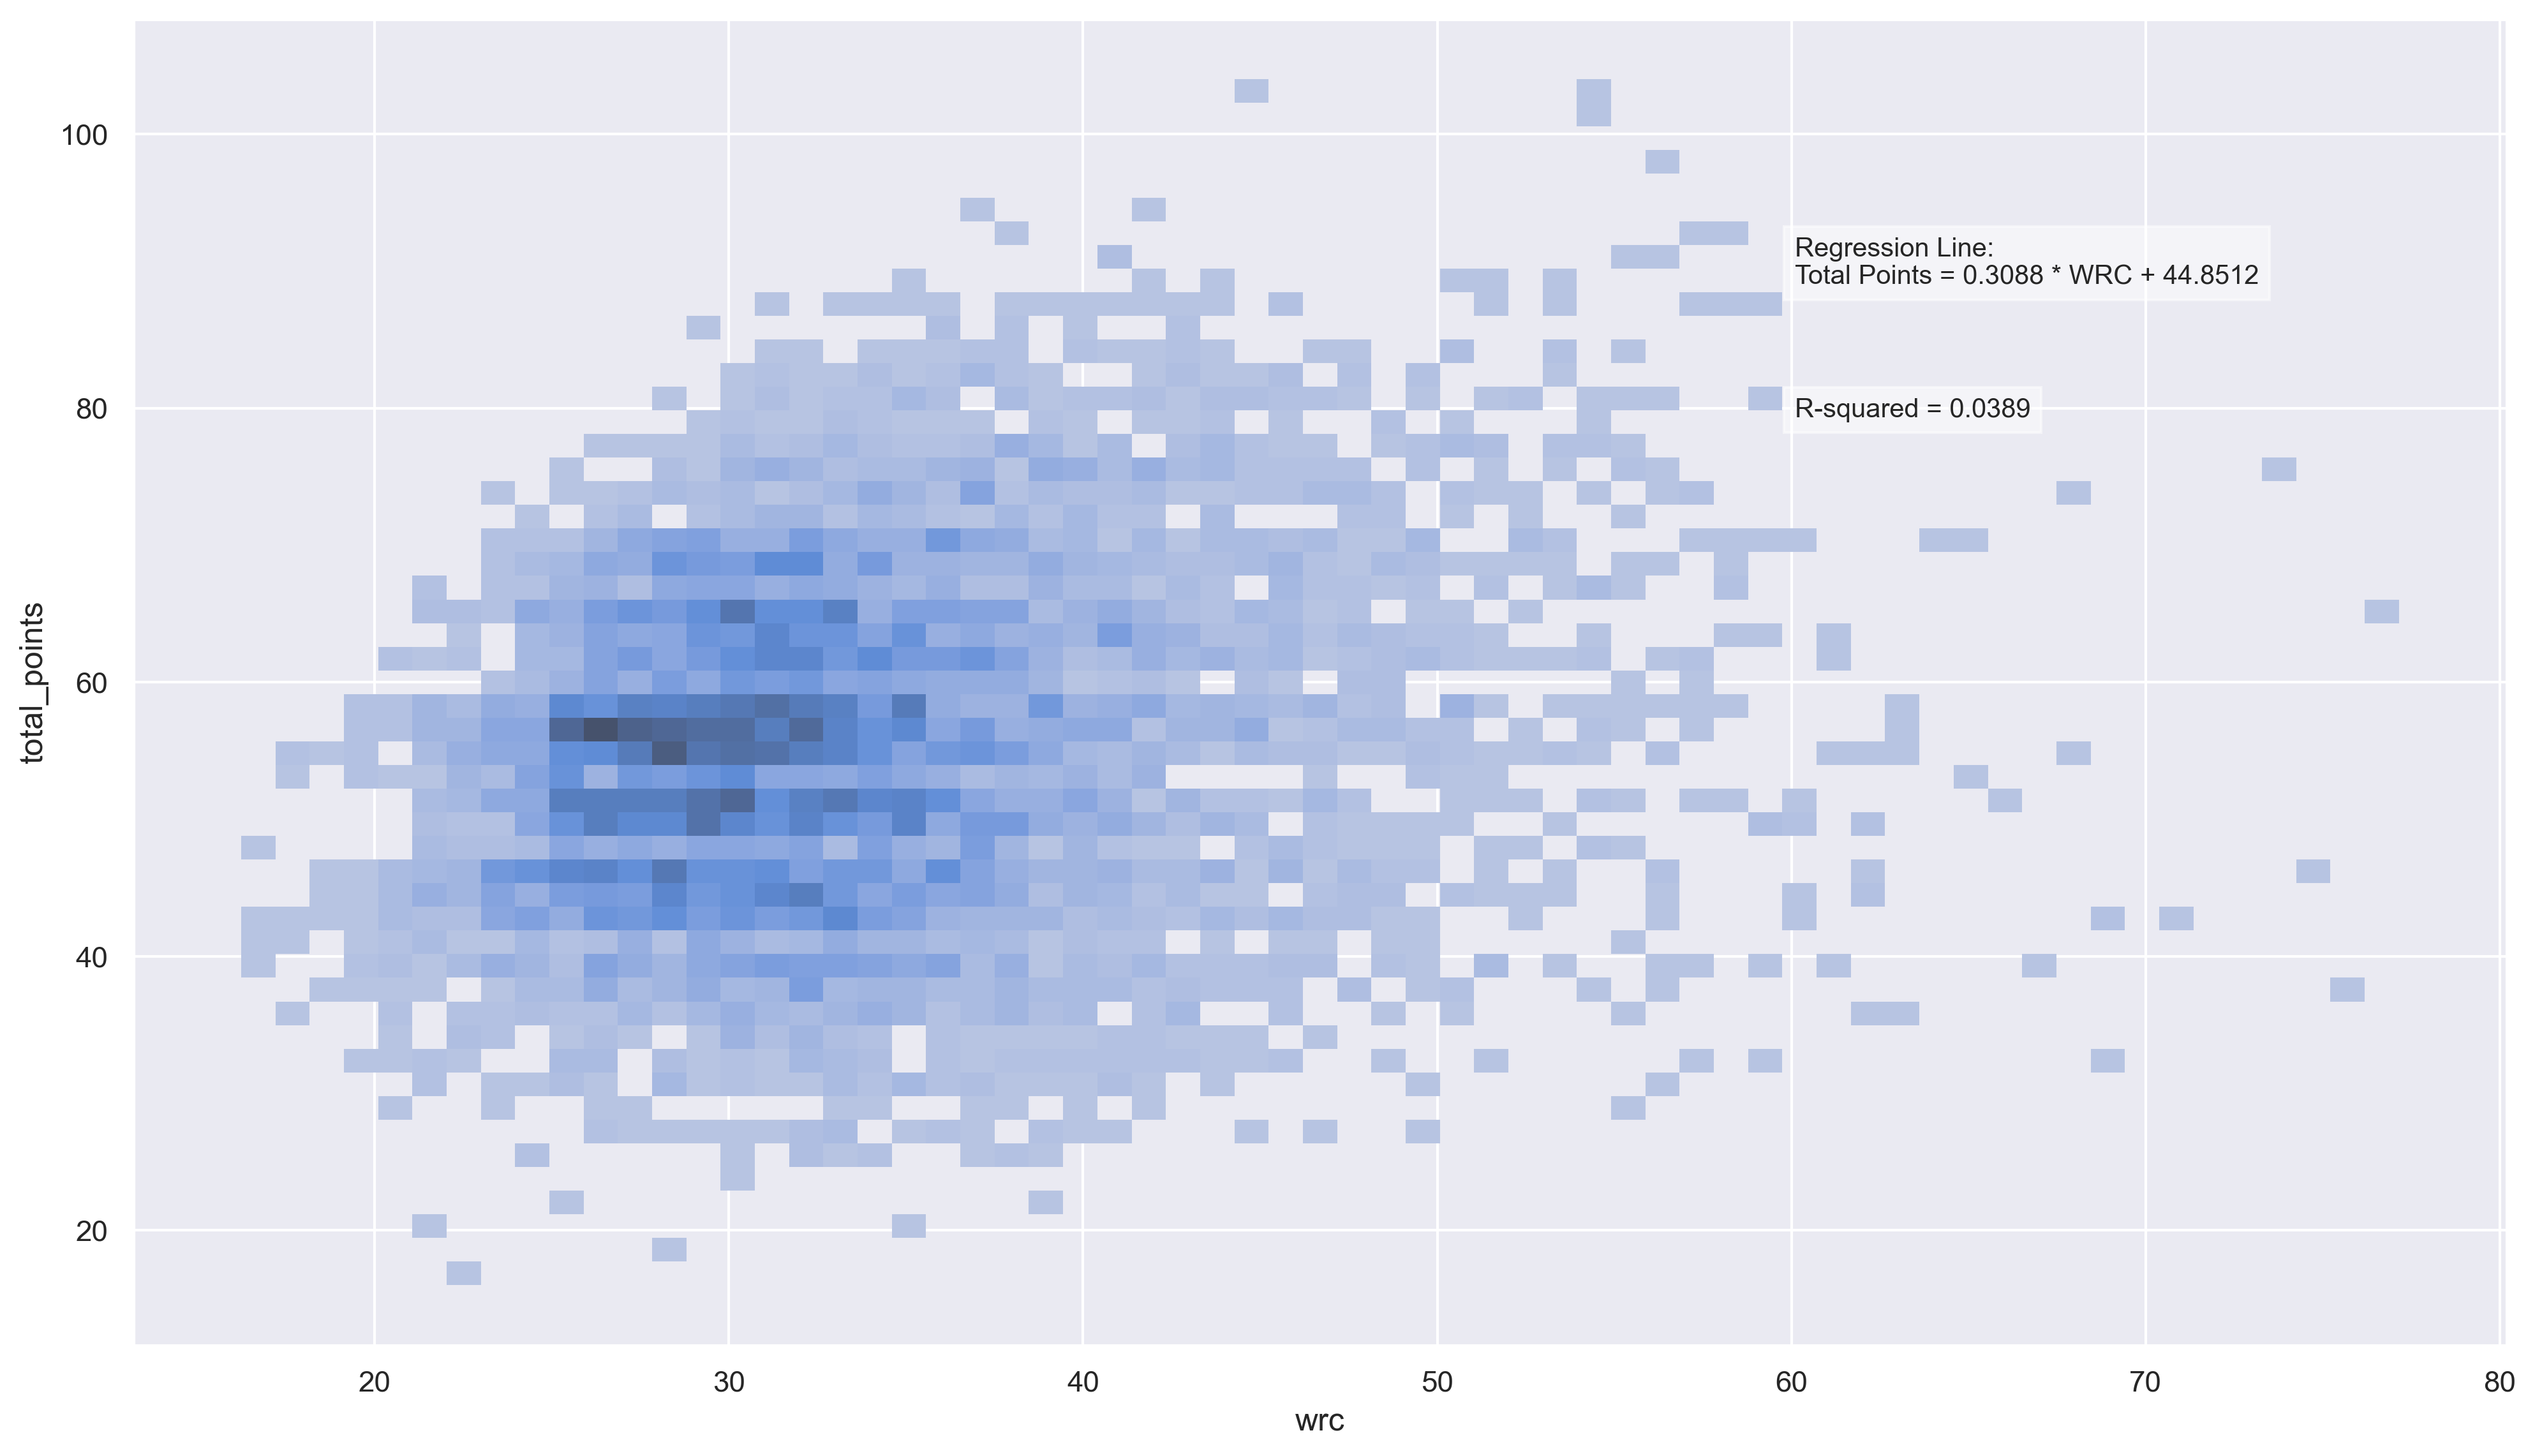

In [9]:
sns.histplot(data=df, x='wrc', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['wrc'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * WRC + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

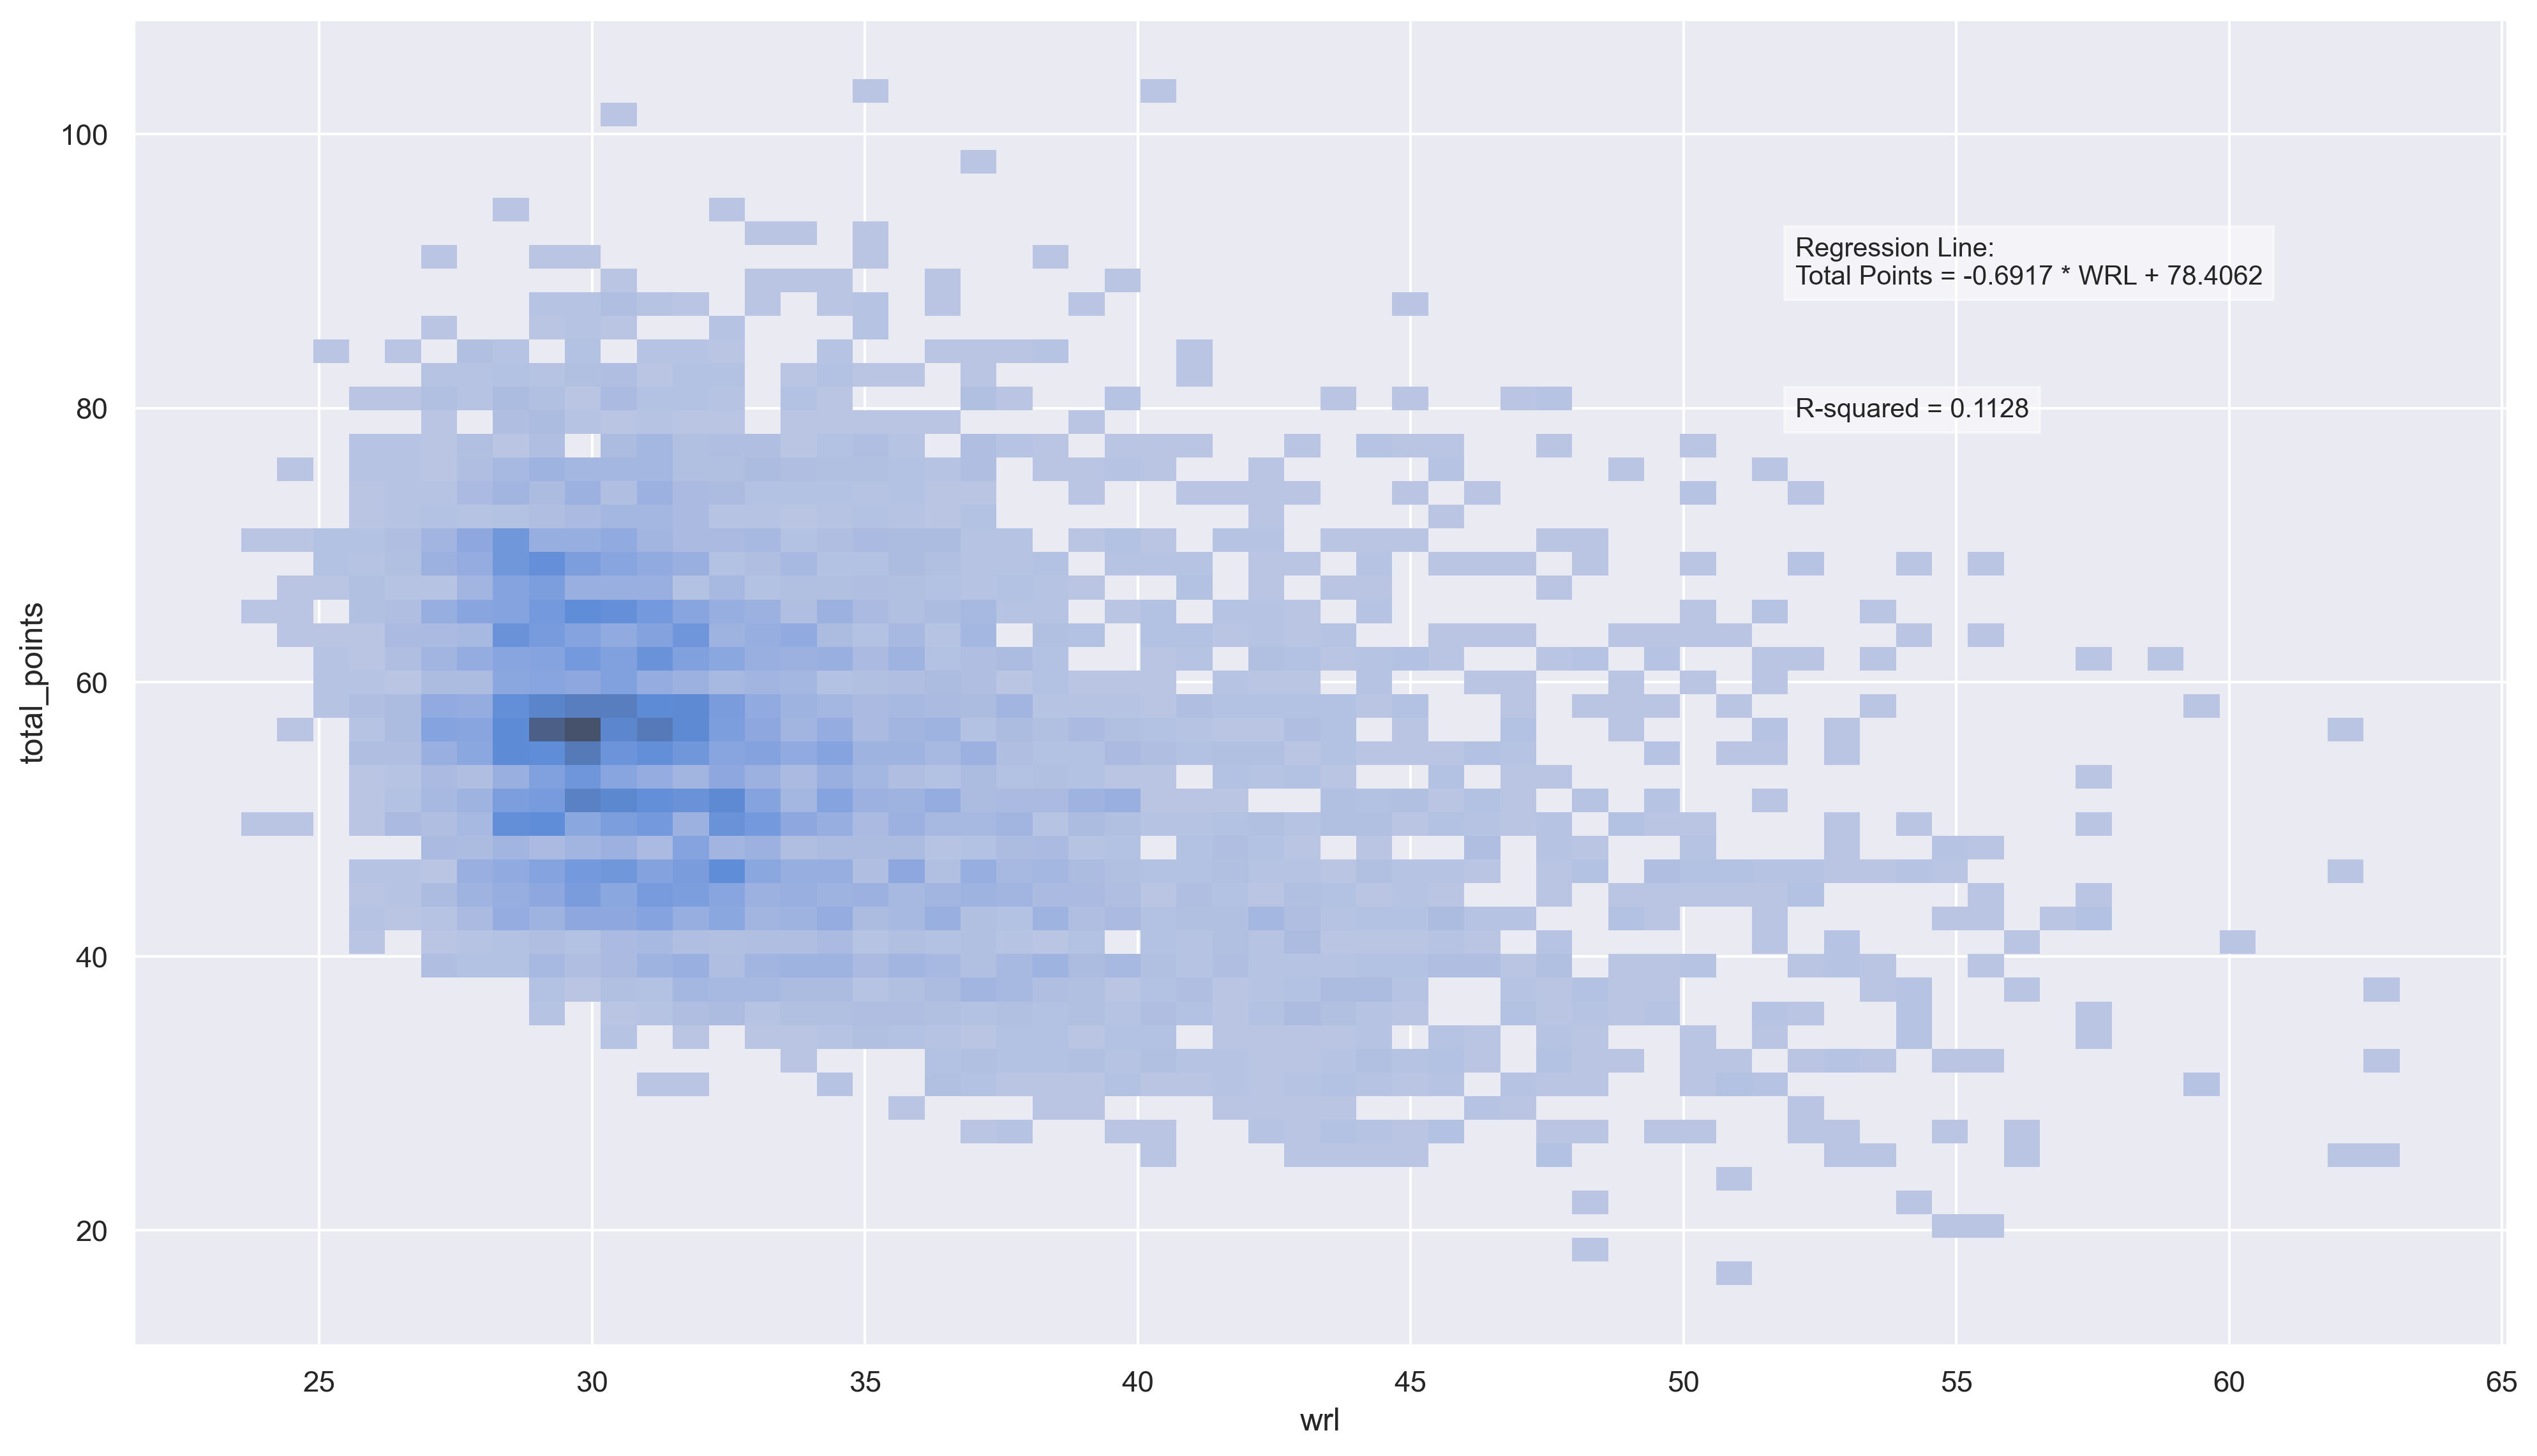

In [10]:
sns.histplot(data=df, x='wrl', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['wrl'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * WRL + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

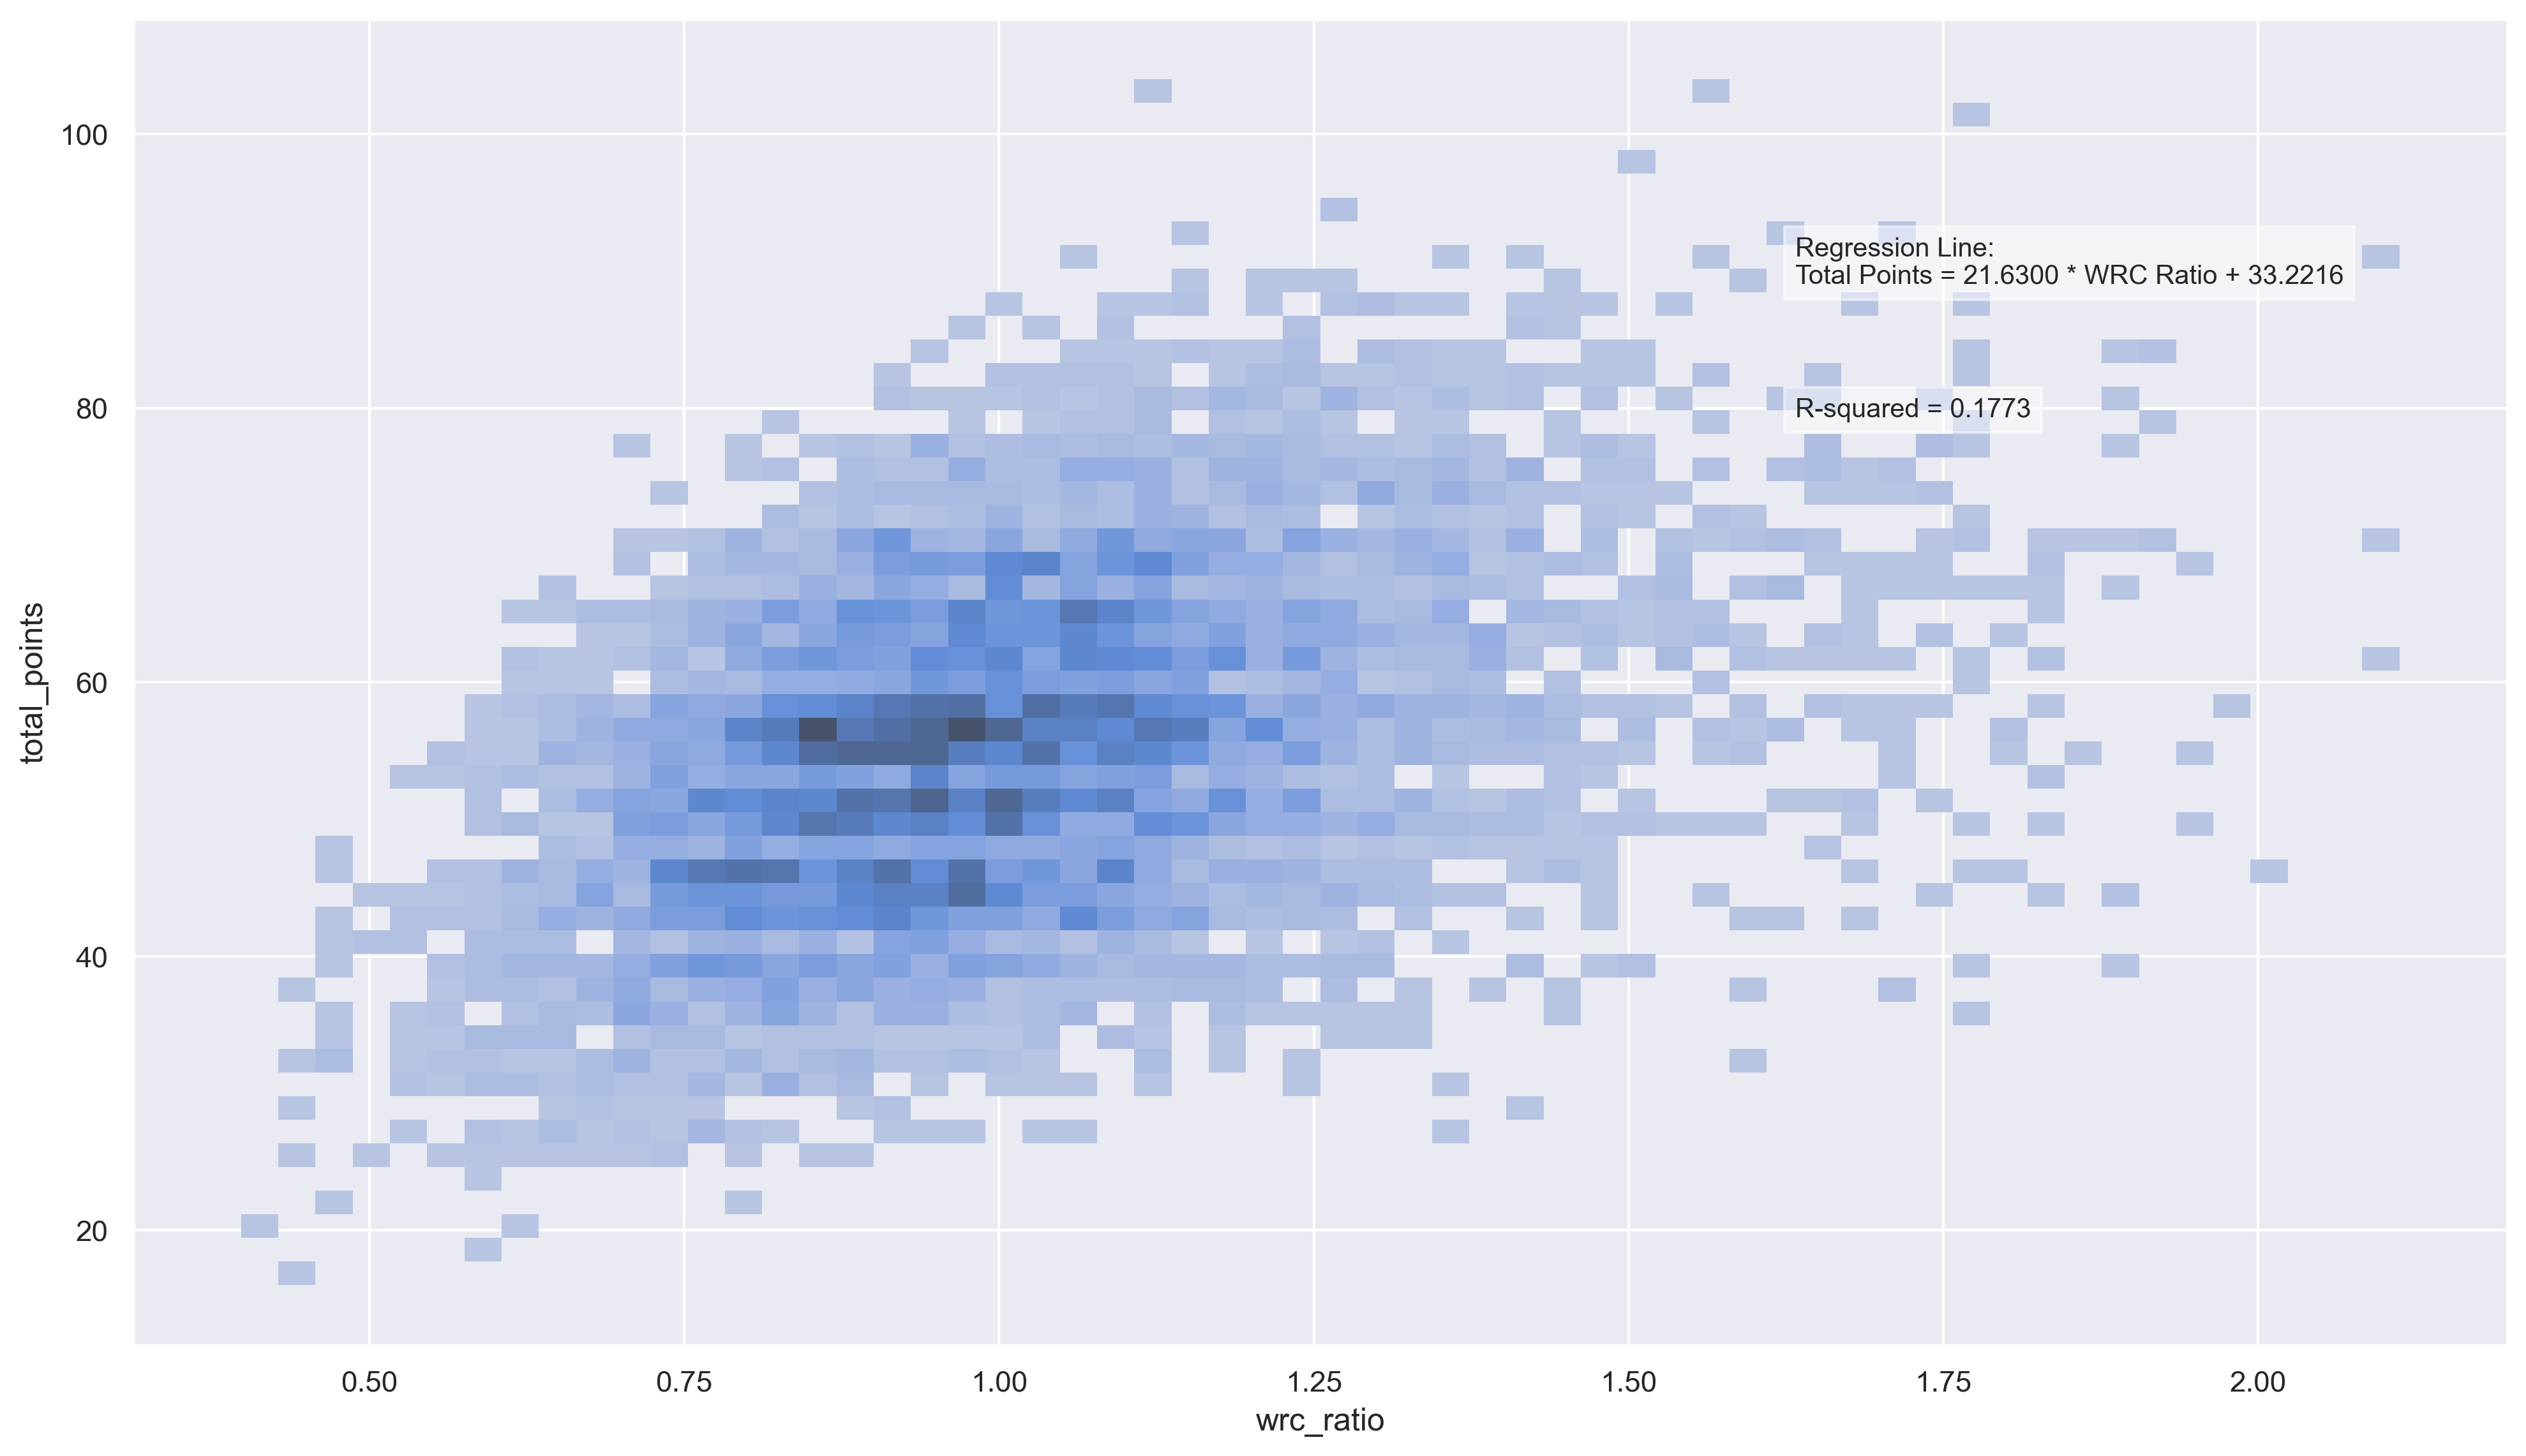

In [11]:
sns.histplot(data=df, x='wrc_ratio', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['wrc_ratio'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * WRC Ratio + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

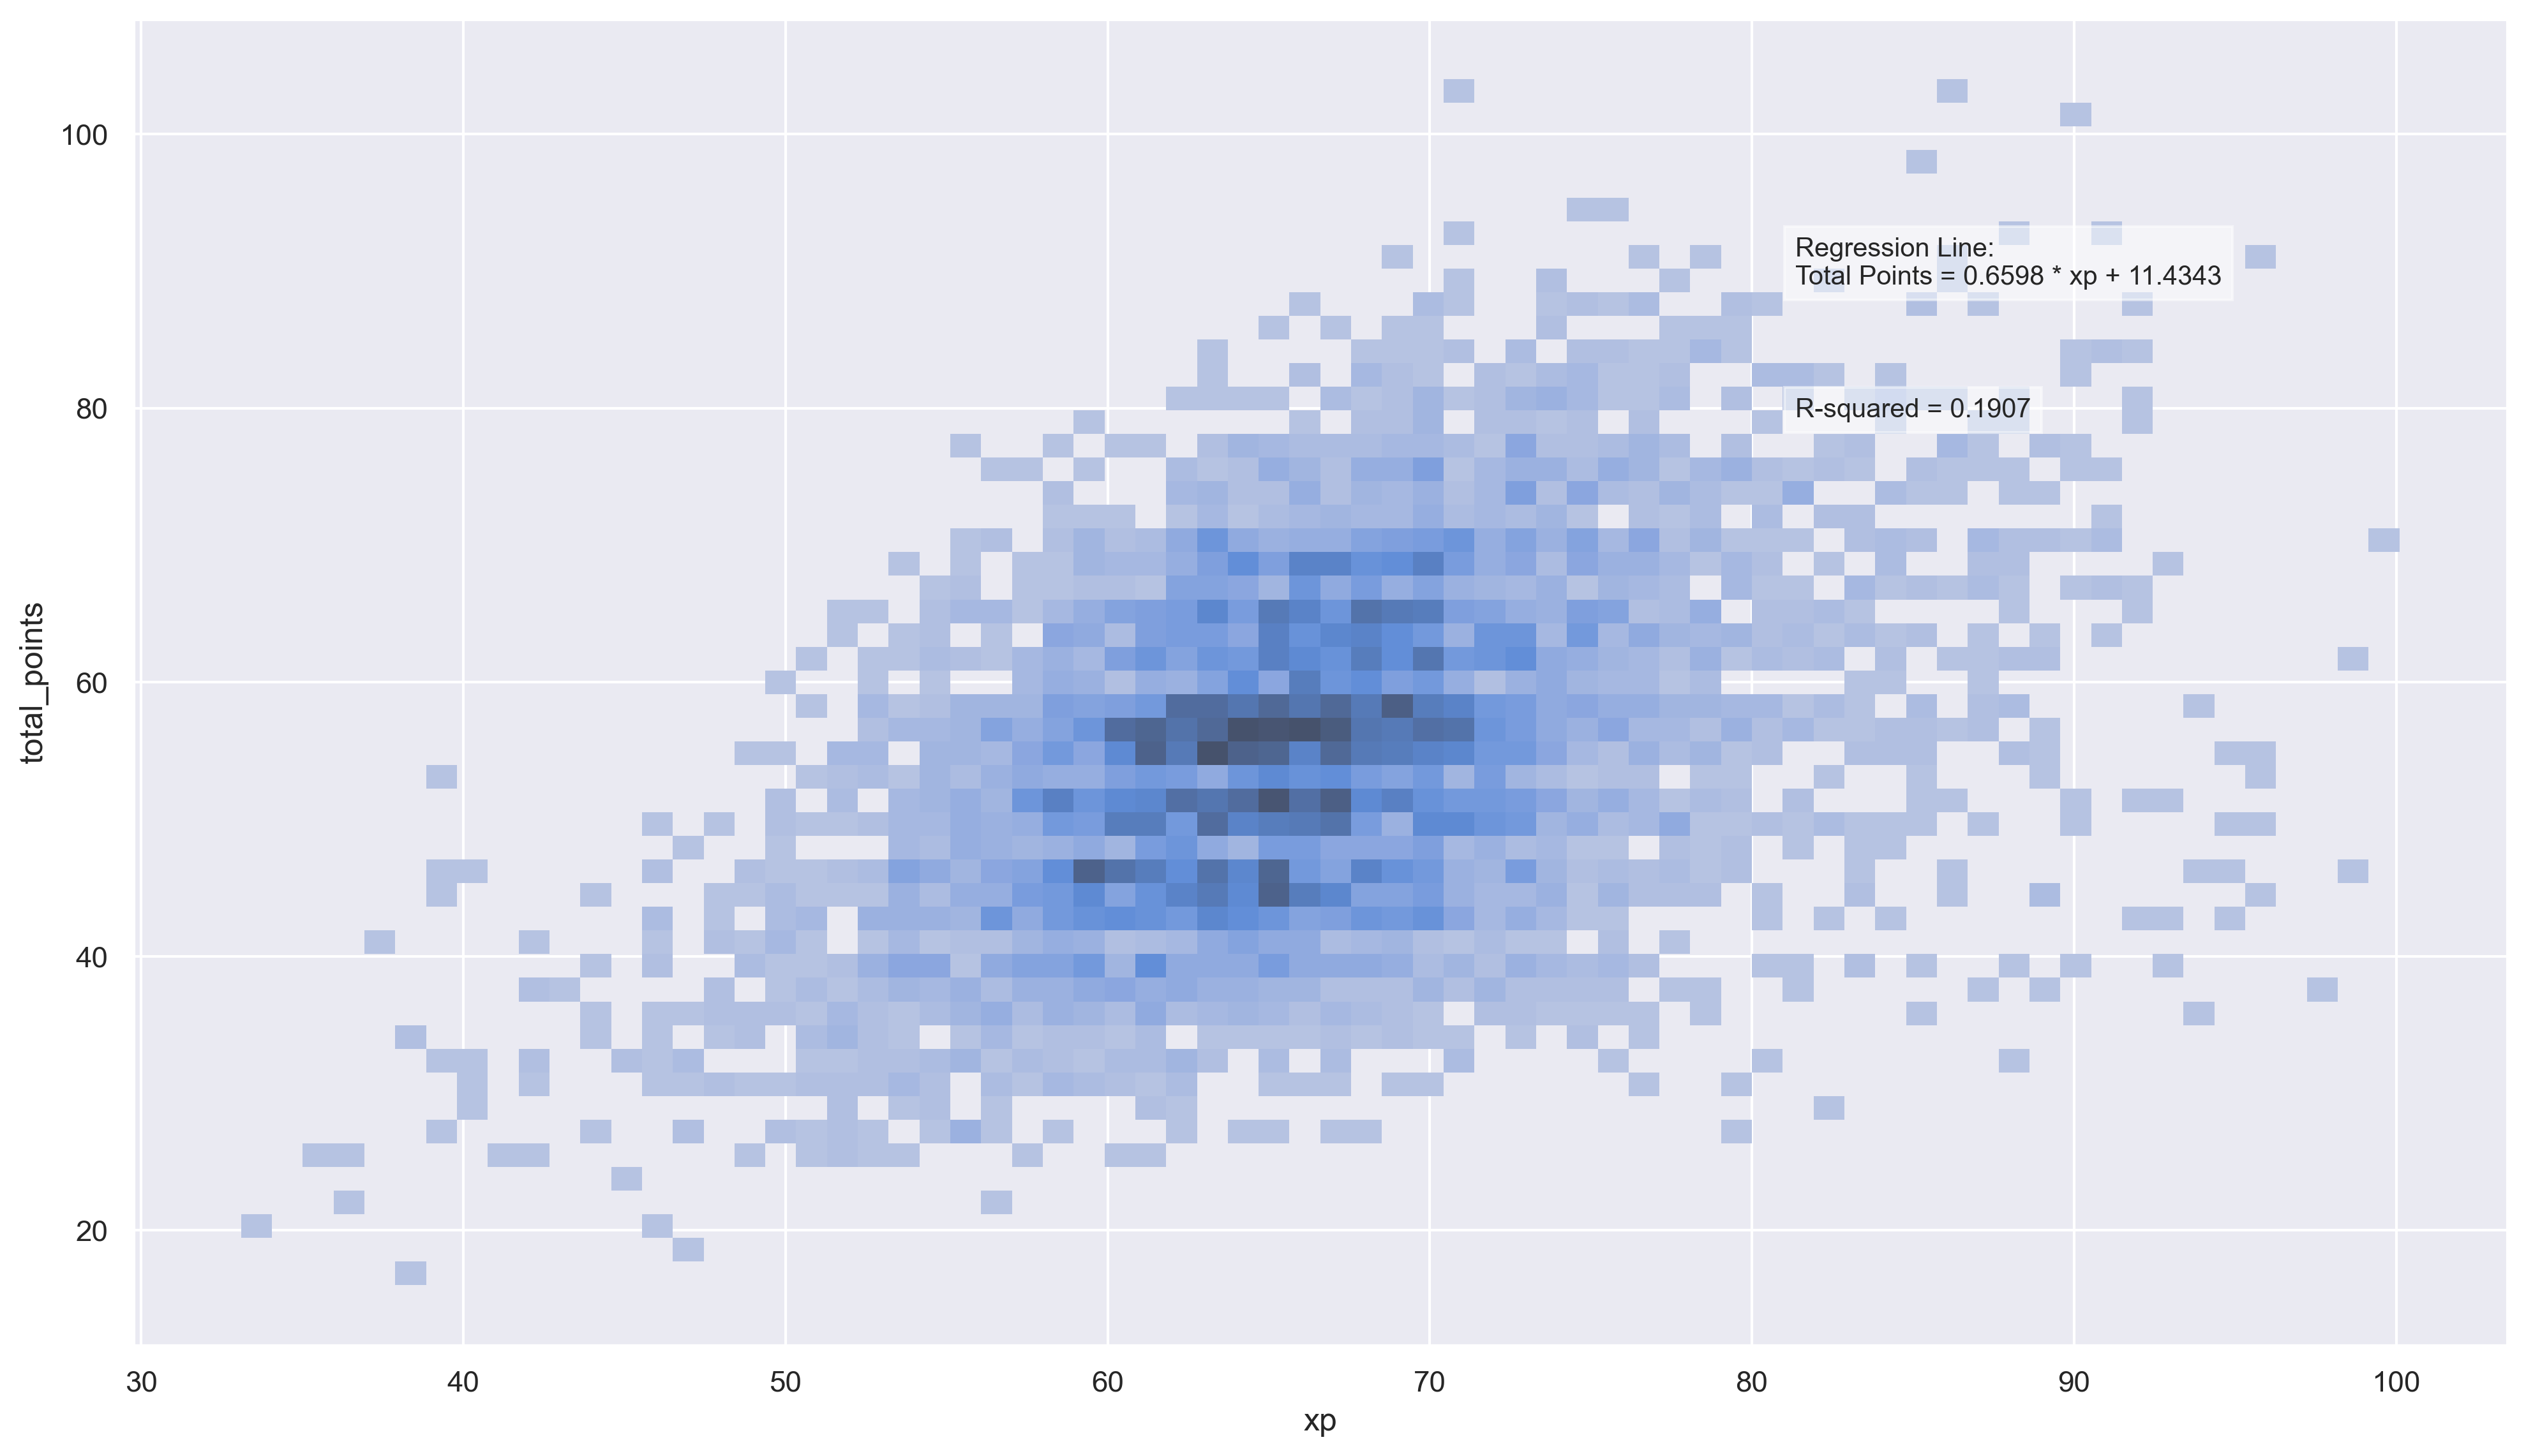

In [23]:
sns.histplot(data=df, x='xp', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['xp'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * xp + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [12]:
df[df['entry'].isin([82846, 15644, 21482])]

,team_name,entry,country,total_points,was_home,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,xp,wrc,wrl,wrc_ratio
1600,Pick of Destiny,82846,Sweden,68,8,1290,3,5,2,22,...,15,6.13,3.47,9.60,18.67,1007,70.6,33.162209,28.832302,1.150176
1920,El grande mums!,15644,Sweden,61,10,1068,3,4,2,19,...,12,4.94,3.51,8.45,15.85,988,61.7,24.772652,29.342746,0.844251
5922,Finnboda Hotspur FC,21482,Sweden,39,8,1014,1,1,1,18,...,12,2.82,0.82,3.64,14.05,984,88.0,67.351619,45.621713,1.476306


In [15]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
bootstrap: json = rq.get(url).json()

In [20]:
dict_xp = {}
position_dict: dict = {1: 'GOAL', 2: 'DEF', 3: 'MID', 4: 'FWD'}

dict_xp['first_name'] = [player['first_name'] for player in bootstrap['elements']]
dict_xp['second_name'] = [player['second_name'] for player in bootstrap['elements']]
dict_xp['position'] = [position_dict[int(player['element_type'])] for player in bootstrap['elements']]
dict_xp['id'] = [player['id'] for player in bootstrap['elements']]
dict_xp['value'] = [int(player['now_cost']) for player in bootstrap['elements']]
dict_xp['xp'] = [float(player['ep_this']) for player in bootstrap['elements']]
dict_xp['selected'] = [float(player['selected_by_percent']) / 100 for player in bootstrap['elements']]

df_xp = pd.DataFrame(dict_xp)

In [21]:
df_xp['wrc'] = (1 - df_xp['selected']) * df_xp['xp']
df_xp['wrl'] = df_xp['selected'] * df_xp['xp']
df_xp['wrc_ratio'] = df_xp['wrc'] / df_xp['wrl']

df_xp = df_xp[(df_xp['selected'] > 0) & (df_xp['wrc_ratio'] < 15) & (df_xp['position'] == 'DEF')]
df_xp

,first_name,second_name,position,id,value,xp,selected,wrc,wrl,wrc_ratio
4,Gabriel,dos Santos Magalhães,DEF,5,49,1.2,0.189,0.9732,0.2268,4.291005
19,William,Saliba,DEF,20,52,5.2,0.283,3.7284,1.4716,2.533569
26,Benjamin,White,DEF,29,55,3.5,0.093,3.1745,0.3255,9.752688
37,Matty,Cash,DEF,36,45,7.8,0.095,7.0590,0.7410,9.526316
115,Rico,Henry,DEF,103,46,3.7,0.067,3.4521,0.2479,13.925373
143,Pervis,Estupiñán,DEF,131,53,6.3,0.645,2.2365,4.0635,0.550388
219,Ben,Chilwell,DEF,195,58,5.2,0.315,3.5620,1.6380,2.174603
227,Malo,Gusto,DEF,203,41,5.8,0.082,5.3244,0.4756,11.195122
243,Axel,Disasi,DEF,611,51,6.2,0.066,5.7908,0.4092,14.151515
342,Trent,Alexander-Arnold,DEF,290,79,1.3,0.133,1.1271,0.1729,6.518797


In [22]:
fpl.team_dict[21482].player_dict